In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from pathlib import Path
from statistics import mean
import matplotlib.pyplot as plt

In [6]:
# ------------------------------- setting start ------------------------------ #
# color
color_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
errorbar_color = "#3A3A3A"

# font
csfont = {'family':'Times New Roman', 'serif': 'Times' , 'size' : 23}
plt.rc('text', usetex=True)
plt.rc('font', **csfont)

# bar plot size
bar_width = 0.4
bar_btw_space = 0.04
bar_space = 0.2

# errorbar plot size
err_lw=1.5
err_capsize=4
err_capthick=1.5

# set fig size
figsize=(6.4, 4.8)
# -------------------------------- setting end ------------------------------- #

<ipython-input-16-ede5f212ecca>:50: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x='time', y='real_quality',
<ipython-input-16-ede5f212ecca>:50: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(x='time', y='real_quality',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


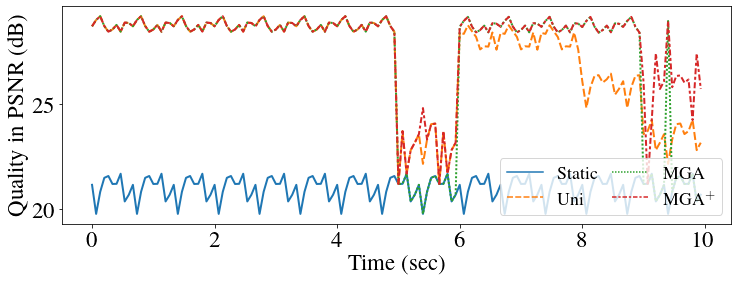

<ipython-input-16-ede5f212ecca>:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["sol_name"] = "Throughput"
<ipython-input-16-ede5f212ecca>:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp["real_rate_Mbps"] = tmp["bit_for_frame"] / 1000000
<ipython-input-16-ede5f212ecca>:87: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x='frame_num', y='real_rate_Mbps',
The PostScript backend does not support transparency; partially transparent ar

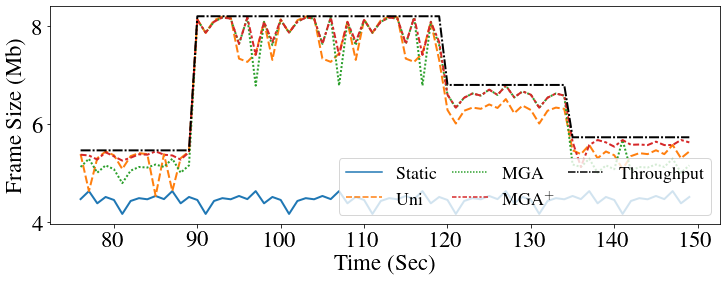

<ipython-input-16-ede5f212ecca>:115: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x='time', y='save_Mbits',
<ipython-input-16-ede5f212ecca>:115: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(x='time', y='save_Mbits',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


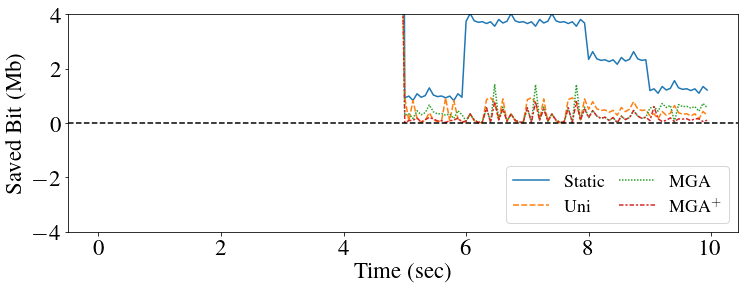

<ipython-input-16-ede5f212ecca>:140: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(x='time', y='num_of_sample',
<ipython-input-16-ede5f212ecca>:140: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  ax = sns.lineplot(x='time', y='num_of_sample',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


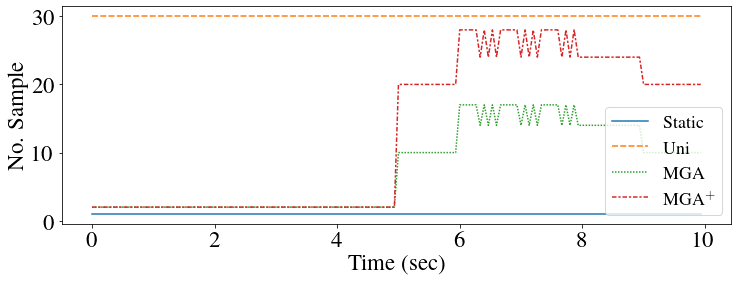

In [16]:
def comparison_diff_sol_frame_by_frame():
    # Specific trace, specific scene, and different solutions
    dataset_name = "hoodie"
    sol_names = ["draco", "fixed", "sol_1", "sol_4"]
    
    roundNum = 12
    
    # Trace info
    network_name = "5g" # {"broadband"}
    trace_num = 0
    mobility_mode = "driving"
    num_of_user = 1 # {1, 5, 10}
    
    window_size = 1
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df = pd.DataFrame()
    fileDir = Path(".")/f"csv_exp{roundNum}"
 
    for projName in [f"{dataset_name}"]:
        for solName in sol_names:
            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
            tmp = pd.read_csv(filePath)
            tmp["dataset_name"] = dataset_name
            if df.empty:
                df = tmp
            else:
                df = pd.concat([df, tmp],axis=0)
                
    df["frame_bit"] = (df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000     
    df["save_Mbits"] = (df["bit_for_frame"] - df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000
    df["time"] = df["frame_num"] / 15
    
    df_plot = df
    
    df_plot.replace(["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie"], 
                    ["Bear", "Panda", "B\&P", "Hoodie"], inplace=True)
    
    df.replace(["draco", "fixed", "625_sample", "sol_1", "sol_4"], 
                ["Static", "Uni", "G\&P", "MGA", "MGA$^{+}$"], inplace=True)
    
    hue_order = ["Static", "Uni", "MGA", "MGA$^{+}$"]
    
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    plt.figure().set_figwidth(12)
    ax = sns.lineplot(x='time', y='real_quality',
                    hue="sol_name",
                    hue_order=hue_order,
                    style="sol_name",
                    data=df_plot,
                    palette=color_palette,
                    ci=None,
                    lw=2
                    # errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='Time (sec)', ylabel='Quality in PSNR (dB)')
    # ax.set(ylim = (0.0, 25))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower right', fontsize="18", markerscale=2, ncol=2, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_frameByframe_quality_{mobility_mode}_{trace_num}_u{num_of_user}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_frameByframe_quality_{mobility_mode}_{trace_num}_u{num_of_user}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ---------------------------------------------------------------------------- #
    #                                 Bit for frame                                #
    # ---------------------------------------------------------------------------- #
    df_plot["real_rate_Mbps"] = df_plot["real_rate"] * df_plot["proj_num_of_3dgs"] / 1000000
    
    tmp = df_plot[df_plot["sol_name"] == "Static"]
    tmp["sol_name"] = "Throughput"
    tmp["real_rate_Mbps"] = tmp["bit_for_frame"] / 1000000
    df_tmp = pd.concat([df_plot, tmp],axis=0)
    
    df_tmp = df_tmp[df_tmp["time"] > 5]
    
    tmp_hue_order = ["Static", "Uni", "MGA", "MGA$^{+}$", "Throughput"]
    
    plt.figure().set_figwidth(12)
    # ax = sns.lineplot(x='time', y='real_rate_Mbps',
    ax = sns.lineplot(x='frame_num', y='real_rate_Mbps',
                    hue="sol_name",
                    hue_order=tmp_hue_order,
                    style="sol_name",
                    data=df_tmp,
                    palette=color_palette[:4]+["#000000"],
                    ci=None,
                    lw=2
                    # errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='Time (Sec)', ylabel='Frame Size (Mb)')
    # ax.set(ylim = (0, 4.3))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower right', fontsize="18", markerscale=2, ncol=3, columnspacing=0.8)
    # plt.axhline(0, color='black', linestyle='--')
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_frameByframe_rate_{mobility_mode}_{trace_num}_u{num_of_user}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_frameByframe_rate_{mobility_mode}_{trace_num}_u{num_of_user}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ---------------------------------------------------------------------------- #
    #                                  Saved Rate                                  #
    # ---------------------------------------------------------------------------- #
    df_plot["real_rate_Mbps"] = df_plot["real_rate"] * df_plot["proj_num_of_3dgs"] / 1000000
    
    plt.figure().set_figwidth(12)
    ax = sns.lineplot(x='time', y='save_Mbits',
                    hue="sol_name",
                    hue_order=hue_order,
                    style="sol_name",
                    data=df_plot,
                    palette=color_palette,
                    ci=None
                    # errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='Time (sec)', ylabel='Saved Bit (Mb)')
    ax.set(ylim = (-4, 4))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower right', fontsize="18", markerscale=2, ncol=2, columnspacing=0.8)
    plt.axhline(0, color='black', linestyle='--')
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_frameByframe_savedRate_{mobility_mode}_{trace_num}_u{num_of_user}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_frameByframe_savedRate_{mobility_mode}_{trace_num}_u{num_of_user}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ---------------------------------------------------------------------------- #
    #                                  numOfSample                                 #
    # ---------------------------------------------------------------------------- #
    plt.figure().set_figwidth(12)
    ax = sns.lineplot(x='time', y='num_of_sample',
                    hue="sol_name",
                    hue_order=hue_order,
                    style="sol_name",
                    data=df_plot,
                    palette=color_palette,
                    ci=None
                    # errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='Time (sec)', ylabel='No. Sample')
    # ax.set(ylim = (0.0, 32))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower right', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_frameByframe_numOfSample_{mobility_mode}_{trace_num}_u{num_of_user}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_frameByframe_numOfSample_{mobility_mode}_{trace_num}_u{num_of_user}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
comparison_diff_sol_frame_by_frame() 

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


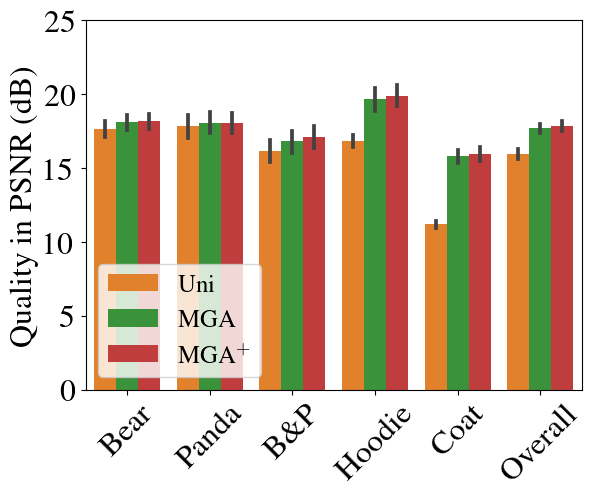


All
sol_name
MGA          17.697483
MGA$^{+}$    17.850149
Uni          15.957495
Name: real_quality, dtype: float64

Bear
sol_name
MGA          18.106025
MGA$^{+}$    18.189569
Uni          17.671588
Name: real_quality, dtype: float64

Panda
sol_name
MGA          18.081384
MGA$^{+}$    18.092059
Uni          17.865116
Name: real_quality, dtype: float64

B\&P
sol_name
MGA          16.822229
MGA$^{+}$    17.092523
Uni          16.183199
Name: real_quality, dtype: float64

Hoodie
sol_name
MGA          19.682856
MGA$^{+}$    19.919062
Uni          16.860896
Name: real_quality, dtype: float64

Coat
sol_name
MGA          15.794922
MGA$^{+}$    15.957534
Uni          11.206676
Name: real_quality, dtype: float64


/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


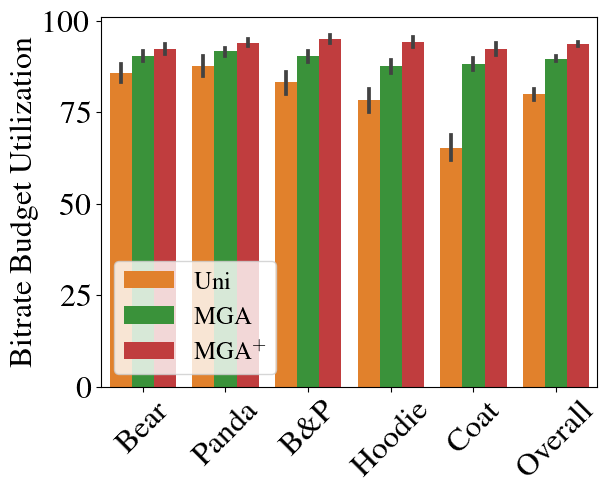


All
sol_name
MGA          2.422366
MGA$^{+}$    2.502282
Uni          2.269913
Name: frame_bit, dtype: float64

Bear
sol_name
MGA          2.435128
MGA$^{+}$    2.483097
Uni          2.412950
Name: frame_bit, dtype: float64

Panda
sol_name
MGA          2.447588
MGA$^{+}$    2.483358
Uni          2.472648
Name: frame_bit, dtype: float64

B\&P
sol_name
MGA          2.445952
MGA$^{+}$    2.542626
Uni          2.345049
Name: frame_bit, dtype: float64

Hoodie
sol_name
MGA          2.407641
MGA$^{+}$    2.542123
Uni          2.242353
Name: frame_bit, dtype: float64

Coat
sol_name
MGA          2.375524
MGA$^{+}$    2.460205
Uni          1.876564
Name: frame_bit, dtype: float64


/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


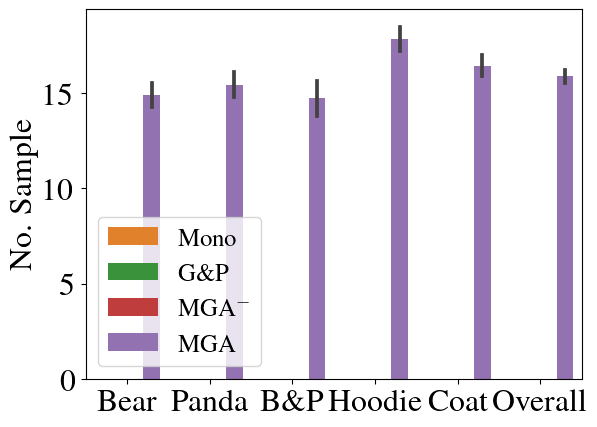

Avg: 2.6197333333333335

All
sol_name
MGA          15.884000
MGA$^{+}$    26.397333
Uni          30.000000
Name: num_of_sample, dtype: float64

Bear
sol_name
MGA          14.926667
MGA$^{+}$    25.193333
Uni          30.000000
Name: num_of_sample, dtype: float64

Panda
sol_name
MGA          15.460000
MGA$^{+}$    26.093333
Uni          30.000000
Name: num_of_sample, dtype: float64

B\&P
sol_name
MGA          14.740000
MGA$^{+}$    25.273333
Uni          30.000000
Name: num_of_sample, dtype: float64

Hoodie
sol_name
MGA          17.84
MGA$^{+}$    28.68
Uni          30.00
Name: num_of_sample, dtype: float64

Coat
sol_name
MGA          16.453333
MGA$^{+}$    26.746667
Uni          30.000000
Name: num_of_sample, dtype: float64


In [11]:
def comparison_diffSol_specificTrace_mean():
    
    dataset_names = ["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie", "coat"]
    new_dataset_names = ["Bear", "Panda", "B\&P", "Hoodie", "Coat"]
    # dataset_names = ["bearPandaRun"]
    sol_names = ["fixed", "sol_1", "sol_4"]
    
    roundNum = 12
    
    # Trace info
    network_name = "5g" # {"broadband"}
    trace_num = 0
    mobility_mode = "walking" # {"walking", "driving"}
    num_of_user = 5 # {1, 10}
    
    window_size = 1
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df = pd.DataFrame()
    fileDir = Path(".")/f"csv_exp{roundNum}"
 
    for dataset_name in dataset_names:
        for solName in sol_names:
            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
            tmp = pd.read_csv(filePath)
            tmp["dataset_name"] = dataset_name
            if df.empty:
                df = tmp
            else:
                df = pd.concat([df, tmp],axis=0)
    
    for dataset_name in dataset_names:
        for solName in sol_names:
            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
            tmp = pd.read_csv(filePath)
            tmp["dataset_name"] = "Overall"
            if df.empty:
                df = tmp
            else:
                df = pd.concat([df, tmp],axis=0)
                
    df["frame_bit"] = (df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000     
    df["save_Mbits"] = (df["bit_for_frame"] - df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000
    df_plot = df
    
    df_plot.replace(["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie", "coat"], 
                    ["Bear", "Panda", "B\&P", "Hoodie", "Coat"], inplace=True)
    
    df.replace(["draco", "fixed", "625_sample", "sol_1", "sol_4"], 
                ["CUR", "Uni", "G\&P", "MGA", "MGA$^{+}$"], inplace=True)
    
    hue_order = ["Uni", "MGA", "MGA$^{+}$"]
    
    df_plot.to_csv("test.csv", index=False)
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    ax = sns.barplot(x='dataset_name', y='real_quality',
                    hue="sol_name",
                    hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='Quality in PSNR (dB)')
    ax.set(ylim = (0, 25))
    # ax.set_yticks([30, 40, 50, 60])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_mean_quality_{mobility_mode}_{trace_num}_u{num_of_user}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_mean_quality_{mobility_mode}_{trace_num}_u{num_of_user}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"\nAll")
    print(df_plot.groupby('sol_name')["real_quality"].mean())
    for dataset_name in new_dataset_names:
        print(f"\n{dataset_name}")
        tmp = df_plot[df_plot["dataset_name"] == dataset_name]
        print(tmp.groupby('sol_name')["real_quality"].mean())
        
    # ---------------------------------------------------------------------------- #
    #                                     Rate                                     #
    # ---------------------------------------------------------------------------- #
    df_plot['utilization'] = ((df["real_rate"] * df["proj_num_of_3dgs"]) / df_plot["bit_for_frame"]) * 100
    avg_Mbits = df_plot["bit_for_frame"].mean() / 1000000
    # plt.figure().set_figwidth(12)
    ax = sns.barplot(x='dataset_name', y='utilization',
                    hue="sol_name",
                    hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='Bitrate Budget Utilization')
    # ax.set(ylim = (-10, 10))
    # ax.set_yticks([30, 40, 50, 60])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    # plt.axhline(avg_Mbits, color='black', linestyle='--')
    plt.savefig(f'{saveDir}/diffSol_mean_rate_{mobility_mode}_{trace_num}_u{num_of_user}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_mean_rate_{mobility_mode}_{trace_num}_u{num_of_user}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # print(f"Avg: {avg_Mbits}")
    print(f"\nAll")
    print(df_plot.groupby('sol_name')["frame_bit"].mean())
    for dataset_name in new_dataset_names:
        print(f"\n{dataset_name}")
        tmp = df_plot[df_plot["dataset_name"] == dataset_name]
        print(tmp.groupby('sol_name')["frame_bit"].mean())
    
    # ---------------------------------------------------------------------------- #
    #                                  numOfSample                                 #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    hue_order = ["Mono", "G\&P", "MGA$^{-}$", "MGA"]
    ax = sns.barplot(x='dataset_name', y='num_of_sample',
                    hue="sol_name",
                    hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='No. Sample')
    # ax.set(ylim = (0.0, 32))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_mean_numOfSample_{mobility_mode}_{trace_num}_u{num_of_user}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_mean_numOfSample_{mobility_mode}_{trace_num}_u{num_of_user}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    print(f"Avg: {avg_Mbits}")
    print(f"\nAll")
    print(df_plot.groupby('sol_name')["num_of_sample"].mean())
    for dataset_name in new_dataset_names:
        print(f"\n{dataset_name}")
        tmp = df_plot[df_plot["dataset_name"] == dataset_name]
        print(tmp.groupby('sol_name')["num_of_sample"].mean())
    
comparison_diffSol_specificTrace_mean() 

<ipython-input-55-910092a547ce>:52: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.lineplot(x='num_of_user', y='real_quality',
<ipython-input-55-910092a547ce>:52: UserWarning: The markers list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(x='num_of_user', y='real_quality',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


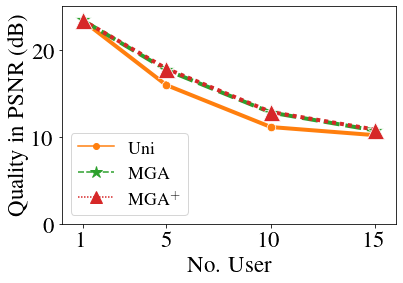

<ipython-input-55-910092a547ce>:89: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  ax = sns.lineplot(x='num_of_user', y='frame_bit',
<ipython-input-55-910092a547ce>:89: UserWarning: The markers list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(x='num_of_user', y='frame_bit',
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


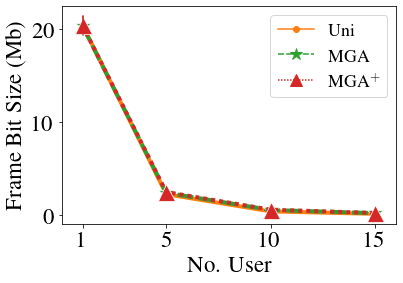

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


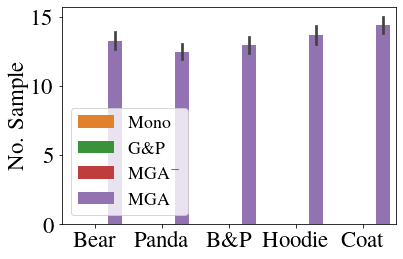

In [55]:
def comparison_diffSol_diffUser_mean():
    
    dataset_names = ["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie", "coat"]
    new_dataset_names = ["Bear", "Panda", "B\&P", "Hoodie", "Coat"]
    # dataset_names = ["bearPandaRun"]
    sol_names = ["fixed", "sol_1", "sol_4"] # ["fixed", "sol_1", "sol_4"]
    
    roundNum = 12
    
    # Trace info
    network_name = "5g" # {"broadband"}
    trace_num = 0
    mobility_mode = "walking" # {"walking", "driving"}
    num_of_users = [1, 5, 10, 15] # {1, 5, 10}
    
    window_size = 1
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df = pd.DataFrame()
    fileDir = Path(".")/f"csv_exp{roundNum}"
 
    for dataset_name in dataset_names:
        for solName in sol_names:
            for num_of_user in num_of_users:
                filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
                tmp = pd.read_csv(filePath)
                tmp["dataset_name"] = dataset_name
                if df.empty:
                    df = tmp
                else:
                    df = pd.concat([df, tmp],axis=0)
    
    df["frame_bit"] = (df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000     
    df["save_Mbits"] = (df["bit_for_frame"] - df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000
    df_plot = df
    
    df_plot.replace(["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie", "coat"], 
                    ["Bear", "Panda", "B\&P", "Hoodie", "Coat"], inplace=True)
    
    df.replace(["draco", "fixed", "625_sample", "sol_1", "sol_4"], 
                ["CUR", "Uni", "G\&P", "MGA", "MGA$^{+}$"], inplace=True)
    
    hue_order = ["Uni", "MGA", "MGA$^{+}$"]
    
    # df_plot.to_csv("test.csv", index=False)
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    ax = sns.lineplot(x='num_of_user', y='real_quality',
                    hue="sol_name",
                    hue_order=hue_order,
                    style="sol_name",
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95),
                    err_style='bars',
                    markers=[".","*","^","D","s","X"],
                    markersize=17,
                    lw=4
                    )
    
    ax.set(xlabel='No. User', ylabel='Quality in PSNR (dB)')
    ax.set(xlim = (0, 16))
    ax.set_xticks(num_of_users)
    ax.set(ylim = (0.0, 25))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_diffUser_mean_quality_{mobility_mode}_{trace_num}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_diffUser_mean_quality_{mobility_mode}_{trace_num}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # print(f"\nAll")
    # print(df_plot.groupby('sol_name')["real_quality"].mean())
    # for dataset_name in new_dataset_names:
    #     print(f"\n{dataset_name}")
    #     tmp = df_plot[df_plot["dataset_name"] == dataset_name]
    #     print(tmp.groupby('sol_name')["real_quality"].mean())
        
    # ---------------------------------------------------------------------------- #
    #                                     Rate                                     #
    # ---------------------------------------------------------------------------- #
    avg_Mbits = df_plot["bit_for_frame"].mean() / 1000000
    # plt.figure().set_figwidth(12)
    ax = sns.lineplot(x='num_of_user', y='frame_bit',
                    hue="sol_name",
                    hue_order=hue_order,
                    style="sol_name",
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95),
                    err_style='bars',
                    markers=[".","*","^","D","s","X"],
                    markersize=17,
                    lw=4
                    )
    
    ax.set(xlabel='No. User', ylabel='Frame Bit Size (Mb)')
    ax.set(xlim = (0, 16))
    ax.set_xticks(num_of_users)
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='upper right', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    # plt.axhline(avg_Mbits, color='black', linestyle='--')
    plt.savefig(f'{saveDir}/diffSol_diffUser_mean_rate_{mobility_mode}_{trace_num}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_diffUser_mean_rate_{mobility_mode}_{trace_num}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # print(f"Avg: {avg_Mbits}")
    # print(f"\nAll")
    # print(df_plot.groupby('sol_name')["frame_bit"].mean())
    # for dataset_name in new_dataset_names:
    #     print(f"\n{dataset_name}")
    #     tmp = df_plot[df_plot["dataset_name"] == dataset_name]
    #     print(tmp.groupby('sol_name')["frame_bit"].mean())
    
    # ---------------------------------------------------------------------------- #
    #                                  numOfSample                                 #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    hue_order = ["Mono", "G\&P", "MGA$^{-}$", "MGA"]
    ax = sns.barplot(x='dataset_name', y='num_of_sample',
                    hue="sol_name",
                    hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95),
                    # err_style='bars'
                    )
    
    ax.set(xlabel='', ylabel='No. Sample')
    # ax.set(ylim = (0.0, 32))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_diffUser_mean_numOfSample_{mobility_mode}_{trace_num}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_diffUser_mean_numOfSample_{mobility_mode}_{trace_num}.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # print(f"Avg: {avg_Mbits}")
    # print(f"\nAll")
    # print(df_plot.groupby('sol_name')["num_of_sample"].mean())
    # for dataset_name in new_dataset_names:
    #     print(f"\n{dataset_name}")
    #     tmp = df_plot[df_plot["dataset_name"] == dataset_name]
    #     print(tmp.groupby('sol_name')["num_of_sample"].mean())
    
comparison_diffSol_diffUser_mean() 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


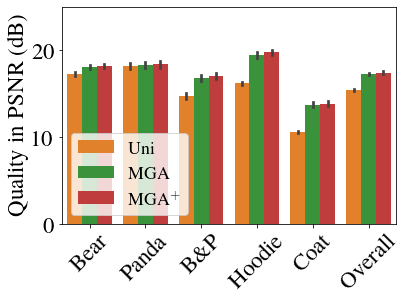

Quality

Overall ['Bear' 'Panda' 'B\\&P' 'Hoodie' 'Coat' 'Overall']
 & Uni & 17.25$\pm$0.25 & 18.17$\pm$0.36 & 14.7$\pm$0.33 & 16.18$\pm$0.19 & 10.61$\pm$0.11 & 15.38$\pm$0.15
 & MGA & 18.03$\pm$0.21 & 18.24$\pm$0.35 & 16.82$\pm$0.33 & 19.44$\pm$0.32 & 13.73$\pm$0.29 & 17.25$\pm$0.15
 & MGA$^{+}$ & 18.13$\pm$0.22 & 18.34$\pm$0.36 & 17.0$\pm$0.34 & 19.75$\pm$0.31 & 13.83$\pm$0.29 & 17.41$\pm$0.15

walking_0 ['Bear' 'Panda' 'B\\&P' 'Hoodie' 'Coat' 'Overall']
 & Uni & 17.67$\pm$0.54 & 17.87$\pm$0.74 & 16.18$\pm$0.73 & 16.86$\pm$0.44 & 11.21$\pm$0.23 & 15.96$\pm$0.31
 & MGA & 18.11$\pm$0.49 & 18.08$\pm$0.73 & 16.82$\pm$0.74 & 19.68$\pm$0.75 & 15.79$\pm$0.47 & 17.7$\pm$0.3
 & MGA$^{+}$ & 18.19$\pm$0.49 & 18.09$\pm$0.73 & 17.09$\pm$0.77 & 19.92$\pm$0.74 & 15.96$\pm$0.48 & 17.85$\pm$0.31

walking_1 ['Bear' 'Panda' 'B\\&P' 'Hoodie' 'Coat' 'Overall']
 & Uni & 19.59$\pm$0.16 & 20.63$\pm$0.06 & 17.87$\pm$0.45 & 17.98$\pm$0.16 & 11.65$\pm$0.16 & 17.54$\pm$0.25
 & MGA & 19.7$\pm$0.08 & 20.61$\pm$0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


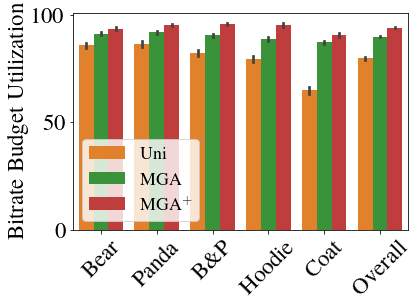

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


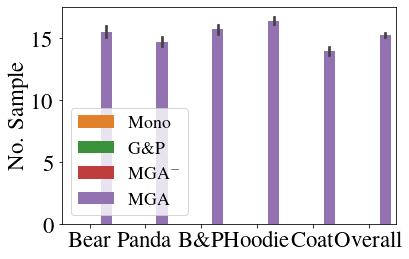

In [52]:
def comparison_diffSol_allTrace_mean():
    
    dataset_names = ["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie", "coat"]
    new_dataset_names = ["Bear", "Panda", "B\&P", "Hoodie", "Coat"]
    # dataset_names = ["bearPandaRun"]
    sol_names = ["fixed", "sol_1", "sol_4"]
    
    roundNum = 12
    
    # Trace info
    network_name = "5g" # {"broadband"}
    trace_nums = [0, 1]
    mobility_modes = ["walking", "driving"] # {"walking", "driving"}
    num_of_users = [5] # {1, 10}
    
    window_sizes = [1]
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df = pd.DataFrame()
    fileDir = Path(".")/f"csv_exp{roundNum}"
 
    for mobility_mode in mobility_modes:
        for trace_num in trace_nums:
            for num_of_user in num_of_users:
                for dataset_name in dataset_names:
                    for window_size in window_sizes:
                        for solName in sol_names:
                            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
                            tmp = pd.read_csv(filePath)
                            tmp["dataset_name"] = dataset_name
                            tmp["trace_name"] = f"{mobility_mode}_{trace_num}"
                            if df.empty:
                                df = tmp
                            else:
                                df = pd.concat([df, tmp],axis=0)
    
    for mobility_mode in mobility_modes:
        for trace_num in trace_nums:
            for num_of_user in num_of_users:
                for dataset_name in dataset_names:
                    for window_size in window_sizes:
                        for solName in sol_names:
                            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
                            tmp = pd.read_csv(filePath)
                            tmp["dataset_name"] = "Overall"
                            tmp["trace_name"] = f"{mobility_mode}_{trace_num}"
                            if df.empty:
                                df = tmp
                            else:
                                df = pd.concat([df, tmp],axis=0)
                
    df["frame_bit"] = (df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000     
    df["save_Mbits"] = (df["bit_for_frame"] - df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000
    df_plot = df
    
    df_plot.replace(["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie", "coat"], 
                    ["Bear", "Panda", "B\&P", "Hoodie", "Coat"], inplace=True)
    
    df.replace(["draco", "fixed", "625_sample", "sol_1", "sol_4"], 
                ["Static", "Uni", "G\&P", "MGA", "MGA$^{+}$"], inplace=True)
    
    hue_order = ["Uni", "MGA", "MGA$^{+}$"]
    
    # df_plot.to_csv("test.csv", index=False)
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    ax = sns.barplot(x='dataset_name', y='real_quality',
                    hue="sol_name",
                    hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='Quality in PSNR (dB)')
    ax.set(ylim = (0, 25))
    # ax.set_yticks([30, 40, 50, 60])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_mean_quality_allTrace.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_mean_quality_allTrace.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Quality")
    df_tmp = df_plot
    print(f"\nOverall", df_tmp["dataset_name"].unique())
    for sol_name in df_tmp["sol_name"].unique():
        df_tmp_tmp = df_tmp[df_tmp["sol_name"] == sol_name]
        data = ["", sol_name]
        # print(sol_name, df_tmp_tmp["dataset_name"].unique())
        for dataset_name in df_tmp_tmp["dataset_name"].unique():
            # print(dataset_name)
            df_print = df_tmp_tmp[df_tmp_tmp["dataset_name"] == dataset_name]
            stats = df_print['real_quality'].agg(['mean', 'sem'])
            # print(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
            data.append(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
        print(' & '.join(data))
        
    for trace_name in df_plot["trace_name"].unique():
        df_tmp = df_plot[df_plot["trace_name"] == trace_name]
        print(f"\n{trace_name}", df_tmp["dataset_name"].unique())
        for sol_name in df_tmp["sol_name"].unique():
            df_tmp_tmp = df_tmp[df_tmp["sol_name"] == sol_name]
            data = ["", sol_name]
            # print(sol_name, df_tmp_tmp["dataset_name"].unique())
            for dataset_name in df_tmp_tmp["dataset_name"].unique():
                df_print = df_tmp_tmp[df_tmp_tmp["dataset_name"] == dataset_name]
                stats = df_print['real_quality'].agg(['mean', 'sem'])
                # print(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
                data.append(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
            print(' & '.join(data))
    # ---------------------------------------------------------------------------- #
    #                                     Rate                                     #
    # ---------------------------------------------------------------------------- #
    df_plot['utilization'] = ((df["real_rate"] * df["proj_num_of_3dgs"]) / df_plot["bit_for_frame"]) * 100
    avg_Mbits = df_plot["bit_for_frame"].mean() / 1000000
    # plt.figure().set_figwidth(12)
    ax = sns.barplot(x='dataset_name', y='utilization',
                    hue="sol_name",
                    hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='Bitrate Budget Utilization')
    # ax.set(ylim = (-10, 10))
    # ax.set_yticks([30, 40, 50, 60])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    # plt.axhline(avg_Mbits, color='black', linestyle='--')
    plt.savefig(f'{saveDir}/diffSol_mean_rate_allTrace.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_mean_rate_allTrace.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    
    # ---------------------------------------------------------------------------- #
    #                                  numOfSample                                 #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    hue_order = ["Mono", "G\&P", "MGA$^{-}$", "MGA"]
    ax = sns.barplot(x='dataset_name', y='num_of_sample',
                    hue="sol_name",
                    hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='No. Sample')
    # ax.set(ylim = (0.0, 32))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/diffSol_mean_numOfSample_allTrace.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/diffSol_mean_numOfSample_allTrace.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
comparison_diffSol_allTrace_mean() 

/var/folders/dg/8kj2178127j0gbm263pw11d40000gn/T/ipykernel_53638/2753869108.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MGA["quality_improvement"] = df_MGA["real_quality"] - df_fixed["real_quality"]
/var/folders/dg/8kj2178127j0gbm263pw11d40000gn/T/ipykernel_53638/2753869108.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MGAP["quality_improvement"] = df_MGAP["real_quality"] - df_fixed["real_quality"]
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWa

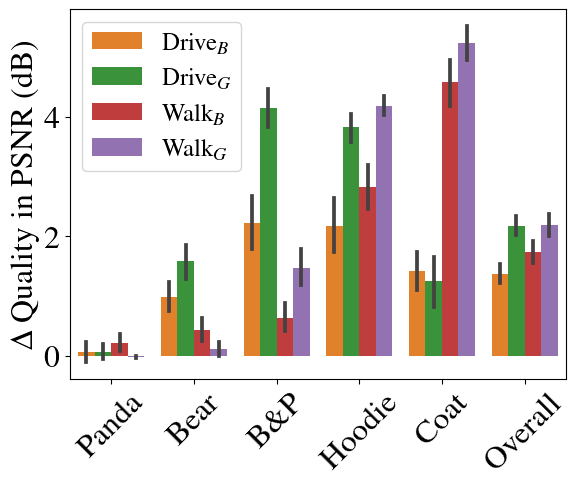

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


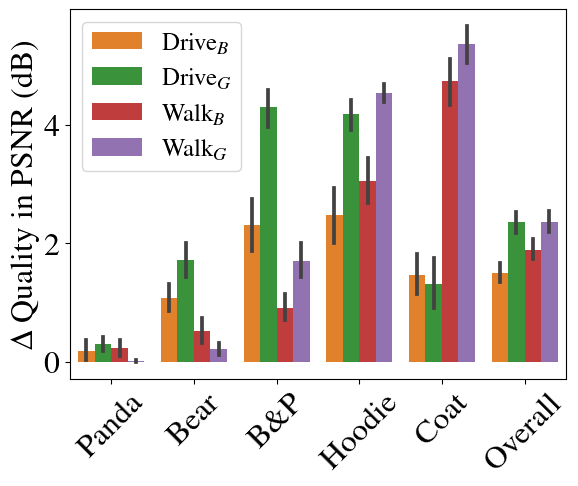

In [51]:
def comparison_diffSol_allTrace_mean():
    
    dataset_names = ["bearRunMove", "pandaRunMove", "bearPandaRun", "hoodie", "coat"]
    new_dataset_names = ["Bear", "Panda", "B\&P", "Hoodie", "Coat"]
    # dataset_names = ["bearPandaRun"]
    sol_names = ["fixed", "sol_1", "sol_4"]
    
    roundNum = 12
    
    # Trace info
    network_name = "5g" # {"broadband"}
    trace_nums = [0, 1]
    mobility_modes = ["driving", "walking"] # {"walking", "driving"}
    num_of_users = [5] # {1, 10}
    
    window_sizes = [1]
    
    saveDir = Path(".")/"figs"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df = pd.DataFrame()
    fileDir = Path(".")/f"csv_exp{roundNum}"
 
    for mobility_mode in mobility_modes:
        for trace_num in trace_nums:
            for num_of_user in num_of_users:
                for dataset_name in dataset_names:
                    for window_size in window_sizes:
                        for solName in sol_names:
                            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
                            tmp = pd.read_csv(filePath)
                            tmp["dataset_name"] = dataset_name
                            tmp["trace_name"] = f"{mobility_mode}_{trace_num}"
                            if df.empty:
                                df = tmp
                            else:
                                df = pd.concat([df, tmp],axis=0)
    
    for mobility_mode in mobility_modes:
        for trace_num in trace_nums:
            for num_of_user in num_of_users:
                for dataset_name in dataset_names:
                    for window_size in window_sizes:
                        for solName in sol_names:
                            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
                            tmp = pd.read_csv(filePath)
                            tmp["dataset_name"] = "Overall"
                            tmp["trace_name"] = f"{mobility_mode}_{trace_num}"
                            if df.empty:
                                df = tmp
                            else:
                                df = pd.concat([df, tmp],axis=0)
                
    df["frame_bit"] = (df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000     
    df["save_Mbits"] = (df["bit_for_frame"] - df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000
    
    df_plot = df
    
    df_plot["dataset_name"].replace(["pandaRunMove", "bearRunMove", "bearPandaRun", "hoodie", "coat"], 
                    ["Panda", "Bear", "B\&P", "Hoodie", "Coat"], inplace=True)
    
    df_plot["sol_name"].replace(["draco", "fixed", "625_sample", "sol_1", "sol_4"], 
                    ["Static", "Uni", "G\&P", "MGA", "MGA$^{+}$"], inplace=True)
    
    df_plot["trace_name"].replace(["walking_0", "walking_1", "driving_0", "driving_1"], 
                                ["Walk$_{B}$", "Walk$_{G}$", "Drive$_{B}$", "Drive$_{G}$"], inplace=True)
    
    # hue_order = ["Uni", "MGA", "MGA$^{+}$"]
    
    df_fixed = df_plot[df_plot["sol_name"] == "Uni"]
    df_MGA = df_plot[df_plot["sol_name"] == "MGA"]
    df_MGAP = df_plot[df_plot["sol_name"] == "MGA$^{+}$"]
    
    df_MGA["quality_improvement"] = df_MGA["real_quality"] - df_fixed["real_quality"]
    df_MGAP["quality_improvement"] = df_MGAP["real_quality"] - df_fixed["real_quality"]
    
    df_MGA.to_csv("test.csv", index=False)
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    ax = sns.barplot(x='dataset_name', y='quality_improvement',
                    hue="trace_name",
                    # hue_order=hue_order,
                    data=df_MGA,
                    palette=color_palette[1:],
                    errorbar=('ci', 95),
                    order=["Panda", "Bear", "B\&P", "Hoodie", "Coat", "Overall"]
                    )
    
    ax.set(xlabel='', ylabel=r'$\Delta$ Quality in PSNR (dB)')
    # ax.set(ylim = (0, 25))
    # ax.set_yticks([30, 40, 50, 60])
    # ax.set_xticks(["Panda", "Bear", "B\&P", "Hoodie", "Coat"])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/scene_qualityImprovement_trace_Uni_MGA.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/scene_qualityImprovement_trace_Uni_MGA.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    ax = sns.barplot(x='dataset_name', y='quality_improvement',
                    hue="trace_name",
                    # hue_order=hue_order,
                    data=df_MGAP,
                    palette=color_palette[1:],
                    errorbar=('ci', 95),
                    order=["Panda", "Bear", "B\&P", "Hoodie", "Coat", "Overall"]
                    )
    
    ax.set(xlabel='', ylabel=r'$\Delta$ Quality in PSNR (dB)')
    # ax.set(ylim = (0, 25))
    # ax.set_yticks([30, 40, 50, 60])
    # ax.set_xticks(["Panda", "Bear", "B\&P", "Hoodie", "Coat"])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/scene_qualityImprovement_trace_Uni_MGAP.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/scene_qualityimprovement_trace_Uni_MGAP.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # print("Quality")
    # df_tmp = df_plot
    # print(f"\nOverall", df_tmp["dataset_name"].unique())
    # for sol_name in df_tmp["sol_name"].unique():
    #     df_tmp_tmp = df_tmp[df_tmp["sol_name"] == sol_name]
    #     data = ["", sol_name]
    #     # print(sol_name, df_tmp_tmp["dataset_name"].unique())
    #     for dataset_name in df_tmp_tmp["dataset_name"].unique():
    #         # print(dataset_name)
    #         df_print = df_tmp_tmp[df_tmp_tmp["dataset_name"] == dataset_name]
    #         stats = df_print['real_quality'].agg(['mean', 'sem'])
    #         # print(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
    #         data.append(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
    #     print(' & '.join(data))
        
    # for trace_name in df_plot["trace_name"].unique():
    #     df_tmp = df_plot[df_plot["trace_name"] == trace_name]
    #     print(f"\n{trace_name}", df_tmp["dataset_name"].unique())
    #     for sol_name in df_tmp["sol_name"].unique():
    #         df_tmp_tmp = df_tmp[df_tmp["sol_name"] == sol_name]
    #         data = ["", sol_name]
    #         # print(sol_name, df_tmp_tmp["dataset_name"].unique())
    #         for dataset_name in df_tmp_tmp["dataset_name"].unique():
    #             df_print = df_tmp_tmp[df_tmp_tmp["dataset_name"] == dataset_name]
    #             stats = df_print['real_quality'].agg(['mean', 'sem'])
    #             # print(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
    #             data.append(f"{round(stats['mean'],2)}$\pm${round(1.96 * stats['sem'],2)}")
    #         print(' & '.join(data))
    
    # # ---------------------------------------------------------------------------- #
    # #                                     Rate                                     #
    # # ---------------------------------------------------------------------------- #
    # df_plot['utilization'] = ((df["real_rate"] * df["proj_num_of_3dgs"]) / df_plot["bit_for_frame"]) * 100
    # avg_Mbits = df_plot["bit_for_frame"].mean() / 1000000
    # # plt.figure().set_figwidth(12)
    # ax = sns.barplot(x='dataset_name', y='utilization',
    #                 hue="sol_name",
    #                 hue_order=hue_order,
    #                 data=df_plot,
    #                 palette=color_palette[1:],
    #                 errorbar=('ci', 95)
    #                 )
    
    # ax.set(xlabel='', ylabel='Bitrate Budget Utilization')
    # # ax.set(ylim = (-10, 10))
    # # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    # plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    # # plt.axhline(avg_Mbits, color='black', linestyle='--')
    # plt.savefig(f'{saveDir}/diffSol_mean_rate_allTrace.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/diffSol_mean_rate_allTrace.eps', dpi=300, bbox_inches='tight')
    # plt.show()
    
    
    # # ---------------------------------------------------------------------------- #
    # #                                  numOfSample                                 #
    # # ---------------------------------------------------------------------------- #
    # # plt.figure().set_figwidth(12)
    # hue_order = ["Mono", "G\&P", "MGA$^{-}$", "MGA"]
    # ax = sns.barplot(x='dataset_name', y='num_of_sample',
    #                 hue="sol_name",
    #                 hue_order=hue_order,
    #                 data=df_plot,
    #                 palette=color_palette[1:],
    #                 errorbar=('ci', 95)
    #                 )
    
    # ax.set(xlabel='', ylabel='No. Sample')
    # # ax.set(ylim = (0.0, 32))
    # # ax.set_yticks([30, 40, 50, 60])
    # # plt.xticks(rotation=45)
    # plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    # plt.savefig(f'{saveDir}/diffSol_mean_numOfSample_allTrace.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/diffSol_mean_numOfSample_allTrace.eps', dpi=300, bbox_inches='tight')
    # plt.show()
    
comparison_diffSol_allTrace_mean() 

/var/folders/dg/8kj2178127j0gbm263pw11d40000gn/T/ipykernel_53638/346746539.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MGAP["quality_improvement"] = df_MGAP["real_quality"] - df_MGA["real_quality"]
/var/folders/dg/8kj2178127j0gbm263pw11d40000gn/T/ipykernel_53638/346746539.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MGAP["sample_increasement"] = (df_MGAP["num_of_sample"] - df_MGA["num_of_sample"]) / df_MGA["num_of_sample"]
/var/folders/dg/8kj2178127j0gbm263pw11d40000gn/T/ipykernel_536

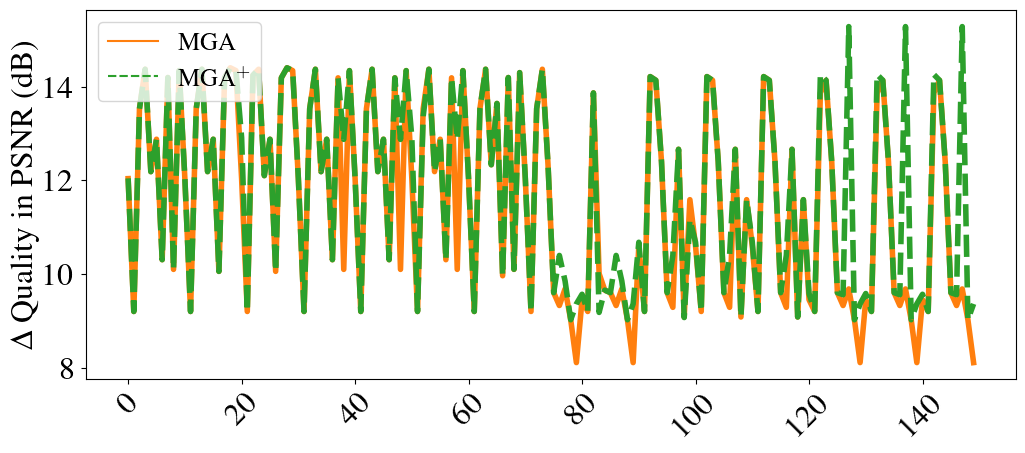

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

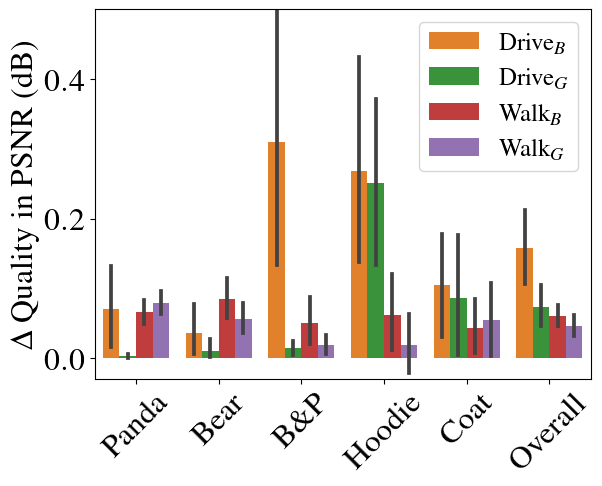

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

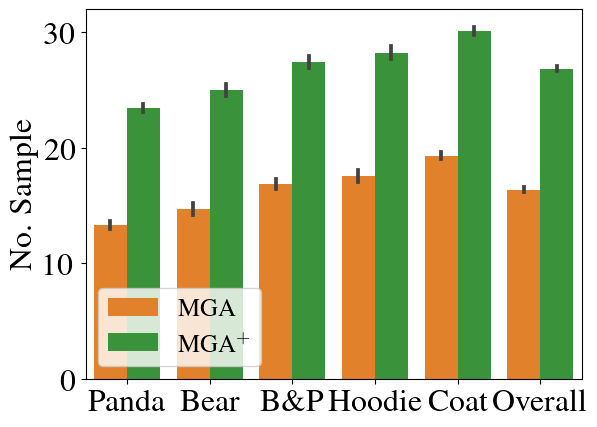

/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/syjintw/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

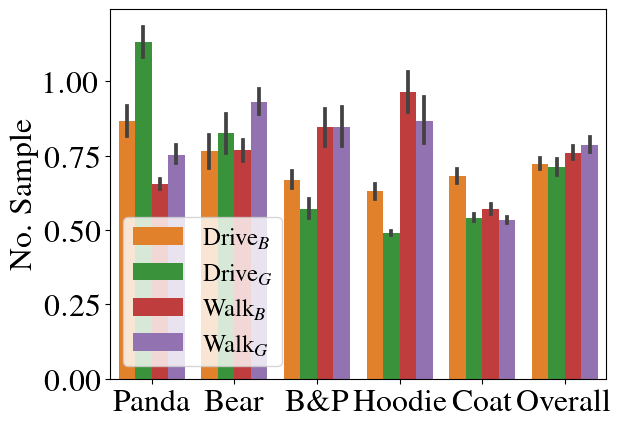

Average quality increasement
0.08425367618269387
Max quality increasement
6.720793048540751
Average percent of sample increasement
74.5643658360878


In [72]:
def improvement_MGA_MGAP():
    
    dataset_names = ["pandaRunMove", "bearRunMove", "bearPandaRun", "hoodie", "coat"]
    # dataset_names = ["bearRunMove"]
    # new_dataset_names = ["Bear", "Panda", "B\&P", "Hoodie", "Coat"]
    # dataset_names = ["bearPandaRun"]
    sol_names = ["sol_1", "sol_4"]
    
    roundNum = 12
    
    # Trace info
    network_name = "5g" # {"broadband"}
    trace_nums = [0, 1]
    mobility_modes = ["driving", "walking"] # {"walking", "driving"}
    num_of_users = [10] # {1, 10}
    
    window_sizes = [1]
    
    saveDir = Path(".")/"fig"/f"round{roundNum}"
    saveDir.mkdir(parents=True, exist_ok=True)
    
    df = pd.DataFrame()
    fileDir = Path(".")/f"csv_exp{roundNum}"
 
    for mobility_mode in mobility_modes:
        for trace_num in trace_nums:
            for num_of_user in num_of_users:
                for dataset_name in dataset_names:
                    for window_size in window_sizes:
                        for solName in sol_names:
                            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
                            tmp = pd.read_csv(filePath)
                            tmp["dataset_name"] = dataset_name
                            tmp["trace_name"] = f"{mobility_mode}_{trace_num}"
                            if df.empty:
                                df = tmp
                            else:
                                df = pd.concat([df, tmp],axis=0)
    
    for mobility_mode in mobility_modes:
        for trace_num in trace_nums:
            for num_of_user in num_of_users:
                for dataset_name in dataset_names:
                    for window_size in window_sizes:
                        for solName in sol_names:
                            filePath = fileDir/f"dynamic_frame_trace_w{window_size}"/f"{dataset_name}_{network_name}_{trace_num}_{mobility_mode}_{num_of_user}_{solName}.csv"
                            tmp = pd.read_csv(filePath)
                            tmp["dataset_name"] = "Overall"
                            tmp["trace_name"] = f"{mobility_mode}_{trace_num}"
                            if df.empty:
                                df = tmp
                            else:
                                df = pd.concat([df, tmp],axis=0)
                
    df["frame_bit"] = (df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000     
    df["save_Mbits"] = (df["bit_for_frame"] - df["real_rate"] * df["proj_num_of_3dgs"]) / 1000000
    
    df_plot = df
    
    df_plot["dataset_name"].replace(["pandaRunMove", "bearRunMove", "bearPandaRun", "hoodie", "coat"], 
                    ["Panda", "Bear", "B\&P", "Hoodie", "Coat"], inplace=True)
    
    df_plot["sol_name"].replace(["draco", "fixed", "625_sample", "sol_1", "sol_4"], 
                    ["Static", "Uni", "G\&P", "MGA", "MGA$^{+}$"], inplace=True)
    
    df_plot["trace_name"].replace(["walking_0", "walking_1", "driving_0", "driving_1"], 
                                ["Walk$_{B}$", "Walk$_{G}$", "Drive$_{B}$", "Drive$_{G}$"], inplace=True)
    
    # hue_order = ["Uni", "MGA", "MGA$^{+}$"]
    
    df_MGA = df_plot[df_plot["sol_name"] == "MGA"]
    df_MGAP = df_plot[df_plot["sol_name"] == "MGA$^{+}$"]
    
    df_MGAP["quality_improvement"] = df_MGAP["real_quality"] - df_MGA["real_quality"]
    df_MGAP["sample_increasement"] = (df_MGAP["num_of_sample"] - df_MGA["num_of_sample"]) / df_MGA["num_of_sample"]
    
    df_MGAP.to_csv("test.csv", index=False)
    
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    # tmp = df_MGAP[df_MGAP["dataset_name"] == "Hoodie"]
    tmp = df_plot[df_plot["dataset_name"] == "Hoodie"]
    tmp = tmp[tmp["trace_name"] == "Drive$_{B}$"]
    plt.figure().set_figwidth(12)
    ax = sns.lineplot(x='frame_num', y='real_quality',
                    hue="sol_name",
                    # hue_order=hue_order,
                    style="sol_name",
                    data=tmp,
                    palette=color_palette[1:],
                    ci=None,
                    # errorbar=('ci', 95),
                    # err_style='bars',
                    # markers=[".","*","^","D","s","X"],
                    # markersize=17,
                    lw=4
                    )
    
    ax.set(xlabel='', ylabel=r'$\Delta$ Quality in PSNR (dB)')
    # ax.set(ylim = (0, 25))
    # ax.set_yticks([30, 40, 50, 60])
    # ax.set_xticks(["Panda", "Bear", "B\&P", "Hoodie", "Coat"])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='upper left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/scene_qualityImprovement_trace_frameByFrame_MGAP_MGA.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/scene_qualityImprovement_trace_frameByFrame_MGAP_MGA.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ---------------------------------------------------------------------------- #
    #                                    Quality                                   #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    ax = sns.barplot(x='dataset_name', y='quality_improvement',
                    hue="trace_name",
                    # hue_order=hue_order,
                    data=df_MGAP,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel=r'$\Delta$ Quality in PSNR (dB)')
    ax.set(ylim = (-0.03, 0.5))
    # ax.set_yticks([30, 40, 50, 60])
    # ax.set_xticks(["Panda", "Bear", "B\&P", "Hoodie", "Coat"])
    plt.xticks(rotation=45)
    plt.legend(title='', loc='upper right', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/scene_qualityImprovement_trace_MGAP_MGA.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/scene_qualityImprovement_trace_MGAP_MGA.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ---------------------------------------------------------------------------- #
    #                                  numOfSample                                 #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    hue_order = ["Mono", "G\&P", "MGA$^{-}$", "MGA"]
    ax = sns.barplot(x='dataset_name', y='num_of_sample',
                    hue="sol_name",
                    # hue_order=hue_order,
                    data=df_plot,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='No. Sample')
    # ax.set(ylim = (0.0, 32))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    # plt.savefig(f'{saveDir}/scene_sampleIncreasement_trace_MGAP_MGA.png', dpi=300, bbox_inches='tight')
    # plt.savefig(f'{saveDir}/scene_sampleIncreasement_trace_MGAP_MGA.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    # ---------------------------------------------------------------------------- #
    #                                  numOfSample                                 #
    # ---------------------------------------------------------------------------- #
    # plt.figure().set_figwidth(12)
    hue_order = ["Mono", "G\&P", "MGA$^{-}$", "MGA"]
    ax = sns.barplot(x='dataset_name', y='sample_increasement',
                    hue="trace_name",
                    # hue_order=hue_order,
                    data=df_MGAP,
                    palette=color_palette[1:],
                    errorbar=('ci', 95)
                    )
    
    ax.set(xlabel='', ylabel='No. Sample')
    # ax.set(ylim = (0.0, 32))
    # ax.set_yticks([30, 40, 50, 60])
    # plt.xticks(rotation=45)
    plt.legend(title='', loc='lower left', fontsize="18", markerscale=2, ncol=1, columnspacing=0.8)
    # sns.move_legend(ax, "upper left", bbox_to_anchor=(1.04, 1), ncol=2)
    plt.savefig(f'{saveDir}/scene_sampleIncreasement_trace_MGAP_MGA.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{saveDir}/scene_sampleIncreasement_trace_MGAP_MGA.eps', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("Average quality increasement")
    print(df_MGAP["quality_improvement"].mean())
    print("Max quality increasement")
    print(df_MGAP["quality_improvement"].max())
    print("Average percent of sample increasement")
    print(df_MGAP["sample_increasement"].mean()*100)
    
    
improvement_MGA_MGAP() 